# Deep Learning for Text with PyTorch 

conda install pytorch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 cpuonly -c pytorch 
pip install torchtext

# Data Preprocessing
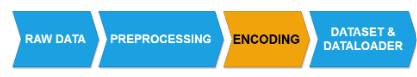

In [1]:
from torchtext.data.utils import get_tokenizer

C:\Users\farih\anaconda3\envs\dl_env\lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [5]:
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer("I am reading a book now. I love to read books!") 
print(tokens)

['i', 'am', 'reading', 'a', 'book', 'now', '.', 'i', 'love', 'to', 'read', 'books', '!']


In [7]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farih\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
stop_words = set (stopwords.words ('english'))
tokens = ["I", "am", "reading", "a", "book", "now", "books", "!"]
"I", "Love", "to", "read",
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

In [11]:
filtered_tokens

['reading', 'book', 'books', '!']

In [23]:
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
filtered_tokens = ["reading", "book", ".", "loving", "read", "books", "!"]
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print(stemmed_tokens)

['read', 'book', '.', 'love', 'read', 'book', '!']


In [32]:
from nltk.probability import FreqDist
stemmed_tokens= ["read", "book", ".", "love", "read", "book", "!"]
freq_dist =FreqDist(stemmed_tokens)
threshold = 2
common_tokens = [token for token in stemmed_tokens if freq_dist[token] >= threshold] 
print(common_tokens)

['read', 'book', 'read', 'book']


# Encoding

In [37]:
import torch
vocab = ['cat', 'dog', 'rabbit']
vocab_size = len(vocab)
one_hot_vectors = torch.eye(vocab_size)

one_hot_dict = {word: one_hot_vectors [i] for i, word in enumerate (vocab)} 
print(one_hot_dict)

{'cat': tensor([1., 0., 0.]), 'dog': tensor([0., 1., 0.]), 'rabbit': tensor([0., 0., 1.])}


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = ['This is the first document.', 'This document is the second document.',
'And this is the third one.', 'Is this the first document?']
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(vectorizer.get_feature_names_out())
# Output term frequecy matrix

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


TFID : across all documents - emphasizes informative words in text data <br>
Lower score - common words <br>
Higher score - rare words

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = ['This is the first document.', 'This document is the second document.',
'And this is the third one.', 'Is this the first document?']
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(vectorizer.get_feature_names_out())

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [50]:
# Import libraries
from torch.utils.data import Dataset, DataLoader # Create a class
class TextDataset (Dataset):
    def __init__(self, text):
        self.text = text
    def __len__(self):
        return len(self.text)
    def __getitem__(self, idx):
        return self.text[idx]

In [54]:

def preprocess_sentences (sentences):
    processed_sentences = []
    for sentence in sentences:
        sentence = sentence.Lower() 
        tokens=tokenizer (sentence)
        tokens = [token for token in tokens if token not in stop_words]
        tokens = [stemmer.stem(token) for token in tokens]
        freq_dist= FreqDist(tokens)
        threshold = 2
        tokens = [token for token in tokens if freq_dist[token] > threshold]
        processed_sentences.append( ' '.join(tokens))
        return processed_sentences

In [61]:
def encode_sentences (sentences):
    vectorizer = CountVectorizer()
    X=vectorizer.fit_transform(sentences)
    encoded_sentences = X.toarray()
    return encoded_sentences, vectorizer

In [63]:
def extract_sentences (data):
    sentences = re.findall(r'[A-Z] [^.!?]*[.!?]',data)
    return sentences

# Text Preprocessing pipeline

In [65]:
def text_processing_pipeline(text):
    tokens = preprocess_sentences (text)
    encoded_sentences, vectorizer = encode_sentences(tokens) 
    dataset = TextDataset(encoded_sentences)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True) 
    return dataloader, vectorizer

In [67]:
text_data = "This is the first text data. And here is another one."
sentences = extract_sentences(text_data)
dataloaders, vectorizer = [text_processing_pipeline (text) for text in sentences]
print(next(iter(data_loader))[0,:10])

NameError: name 're' is not defined